## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 7       8       1       6       8       

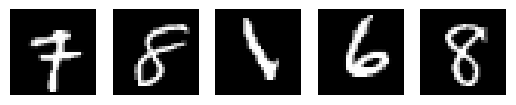

In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(60000, 28 * 28)/255.0                                     # flatten the images of training set
x_test_flatten = x_test.reshape(-1, 28 * 28) /255.0                                # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[0:n_validation,:]
y_validation = y_train[0:n_validation]

x_train_final = x_train_flatten[n_validation:,:]
y_train_final =  y_train[n_validation:]
y_train_final

array([3, 8, 7, ..., 5, 6, 8], dtype=uint8)

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
model = keras.models.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Model.summary of <Sequential name=sequential_2, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(optimizer='sgd',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

n_epochs = 50              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_final,y_train_final,validation_data=(x_validation,y_validation),epochs=n_epochs,shuffle=True,batch_size=512)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3001 - loss: 2.1625 - val_accuracy: 0.6601 - val_loss: 1.6934
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6719 - loss: 1.5609 - val_accuracy: 0.7528 - val_loss: 1.1517
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7587 - loss: 1.0748 - val_accuracy: 0.8048 - val_loss: 0.8453
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8105 - loss: 0.8087 - val_accuracy: 0.8369 - val_loss: 0.6865
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8345 - loss: 0.6714 - val_accuracy: 0.8550 - val_loss: 0.5932
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8512 - loss: 0.5850 - val_accuracy: 0.8660 - val_loss: 0.5311
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8613 - loss: 0.5286 - val_accuracy: 0.8750 - val_loss: 0.4873
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8721 - loss: 0.4843 - val_accuracy: 0.8828 - val_loss

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.2655
Loss =  0.23020945489406586
Accuracy =  93.37999820709229 %


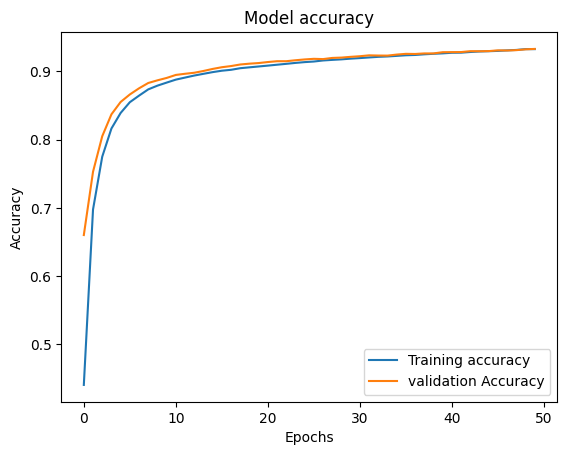

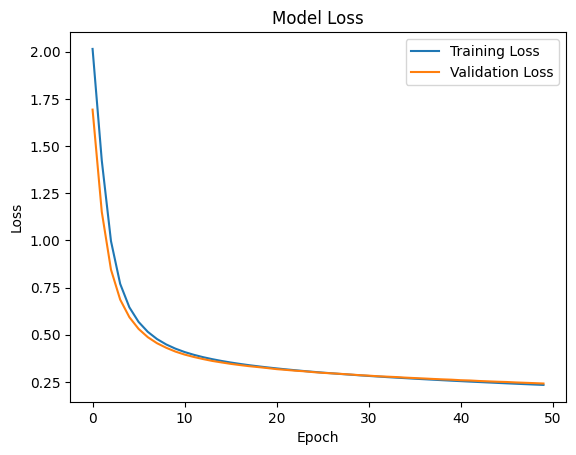

In [ ]:
results = model.evaluate(x_test_flatten,y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
8       8       7       2       6       0       

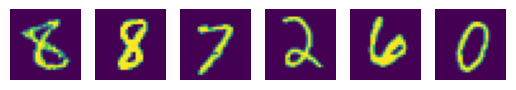

Predicted value: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
8     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
7     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0     
 

In [ ]:
n = 6   # = no. of images to see predictions on

index = np.random.choice(x_test_flatten.shape[0],size=n,replace=False)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind])             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...

    prediction =model.predict(x_test_flatten[ind].reshape(1,784))
    digit =prediction.argmax()
    print(digit,end="     \n ")
